[Check Colab Here](https://colab.research.google.com/drive/1_8pvmalkEXr-bkbY0dALPQsj09ewvwk5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(5)

In [2]:
digits = datasets.load_digits()

n_samples = len(digits.images)
train_nparray_x = digits.images.reshape((n_samples, -1))
train_nparray_y = digits.target

train_x, test_x, train_y, test_y = train_test_split(train_nparray_x, train_nparray_y, stratify=train_nparray_y, test_size=0.25)
print(f"Training with {len(train_x)} and testing with {len(test_x)}")

Training with 1347 and testing with 450


In [3]:
# Baseline
dummy = DummyClassifier()
dummy.fit(train_x, train_y)
dummy_predict = dummy.predict(test_x)
baseline_dummy_accuracy = dummy.score(test_y, dummy_predict)
print(f"Baseline dummy accuracy was {baseline_dummy_accuracy:.2%}")

#Model training
model = SVC()
model.fit(train_x, train_y)
predict = model.predict(test_x)
accuracy = accuracy_score(test_y, predict)
print(f"Accuracy was {accuracy:.2%}")

Baseline dummy accuracy was 100.00%
Accuracy was 98.67%


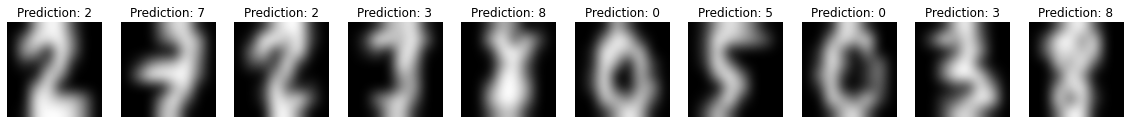

In [4]:
fig_size, imarray = plt.subplots(nrows=1, ncols=10, figsize=(20, 10))
for ax, image, number in zip(imarray, test_x, predict):
  ax.set_axis_off()
  img = image.reshape(8, 8)
  ax.imshow(img, interpolation="bicubic", cmap="gray")
  ax.set_title(f"Prediction: {number}")